<a href="https://colab.research.google.com/github/vn322/Sport-University/blob/main/%D0%B1%D1%80%D0%BE%D1%81%D0%BE%D0%BA_%D0%BF%D1%80%D0%BE%D0%B3%D0%B8%D0%B1%D0%BE%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка данных

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Толстоброва Вика

In [2]:
ura1=pd.read_csv('https://raw.githubusercontent.com/vn322/Sport-University/main/combat/ura1.csv')
ura1

,leftElbow,rightElbow,leftShould,rightShould,leftHip,rightHip,leftKnee,rightKnee,leftAnkle,rightAnkle,leftWrist,rightWrist,Xangle,time,nansec,diftime
0,117,101,73,72,51,16,7,7,23,25,20,92,5.041478,1.709574e+09,1709574154707301800,784548800
1,107,102,76,76,39,26,7,6,23,24,18,103,3.772939,1.709574e+09,1709574155064384400,1141631400
2,113,104,78,73,26,26,14,10,20,24,20,111,2.669108,1.709574e+09,1709574155419435600,1496682600
3,97,102,72,64,30,26,12,11,22,25,20,104,2.013344,1.709574e+09,1709574155791442700,1868689700
4,109,114,67,83,23,34,16,12,21,27,21,102,2.031533,1.709574e+09,1709574156029248700,2106495700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,55,43,31,54,48,43,105,100,63,45,29,28,5.068343,1.709574e+09,1709574187774252600,33851499600
173,55,27,25,59,50,42,105,101,61,44,12,32,6.160807,1.709574e+09,1709574187973664500,34050911500
174,51,19,30,63,51,38,102,101,50,45,14,38,6.022463,1.709574e+09,1709574188176577800,34253824800
175,50,25,29,64,52,43,104,105,64,45,10,34,6.173564,1.709574e+09,1709574188374407800,34451654800


In [3]:
ura1.columns

Index(['leftElbow', 'rightElbow', 'leftShould', 'rightShould', 'leftHip',
       'rightHip', 'leftKnee', 'rightKnee', 'leftAnkle', 'rightAnkle',
       'leftWrist', 'rightWrist', 'Xangle', 'time', 'nansec', 'diftime'],
      dtype='object')

In [18]:
ura_2 = ura1[['leftHip','rightHip', 'leftKnee', 'rightKnee', 'Xangle']]
ura_2 = ura_2.iloc[:140]

In [19]:
ura_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   leftHip    140 non-null    int64  
 1   rightHip   140 non-null    int64  
 2   leftKnee   140 non-null    int64  
 3   rightKnee  140 non-null    int64  
 4   Xangle     140 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 5.6 KB


In [20]:
ura_2.describe()

,leftHip,rightHip,leftKnee,rightKnee,Xangle
count,140.00000,140.000000,140.000000,140.000000,140.000000
mean,31.55000,36.435714,25.207143,26.050000,10.564275
std,15.24775,14.908937,28.780613,20.691403,18.002547
min,9.00000,9.000000,3.000000,6.000000,0.307239
25%,24.00000,28.000000,9.000000,13.000000,2.091517
50%,29.00000,36.000000,14.500000,21.500000,4.949182
75%,35.25000,40.250000,22.250000,27.000000,7.377853
max,121.00000,128.000000,150.000000,132.000000,127.025967


<Axes: >

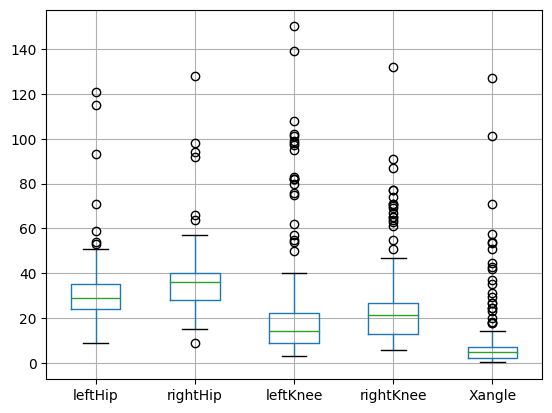

In [21]:
ura_2.boxplot()

<Axes: >

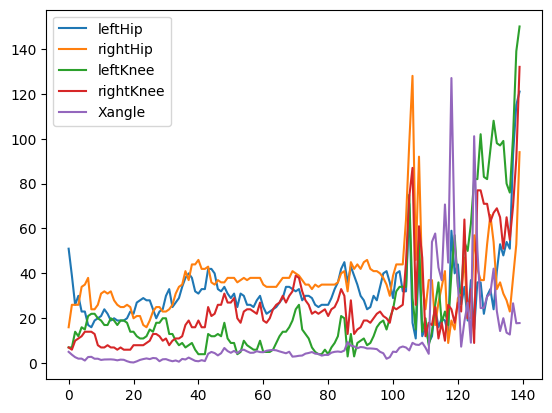

In [22]:
ura_2.plot()

In [29]:
ura_2.corr()

,leftHip,rightHip,leftKnee,rightKnee,Xangle
leftHip,1.000000,0.327656,0.595128,0.616365,0.091956
rightHip,0.327656,1.000000,0.327889,0.618241,0.017034
leftKnee,0.595128,0.327889,1.000000,0.807994,0.432114
rightKnee,0.616365,0.618241,0.807994,1.000000,0.217970
Xangle,0.091956,0.017034,0.432114,0.217970,1.000000


<Axes: >

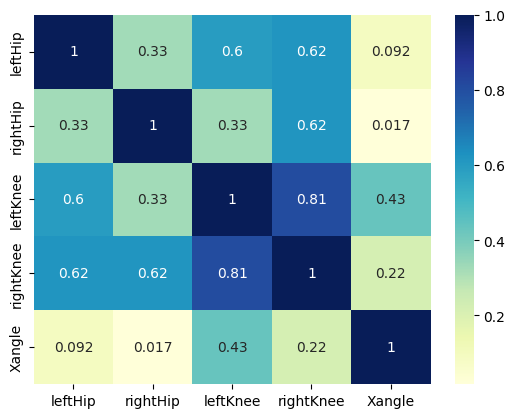

In [28]:
sns.heatmap(ura_2.corr(method='pearson', min_periods=1), cmap="YlGnBu", annot=True)

<Axes: >

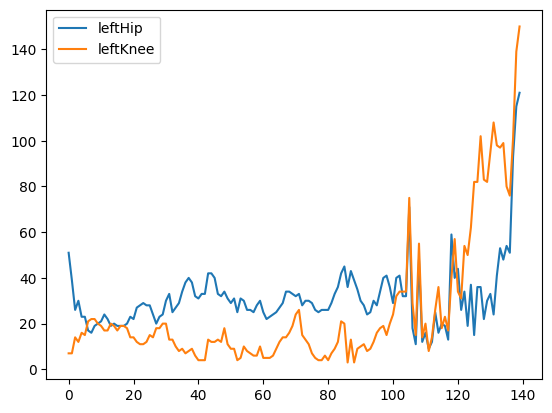

In [30]:
ura_left= ura_2[['leftHip', 'leftKnee']]
ura_left.plot()

<Axes: >

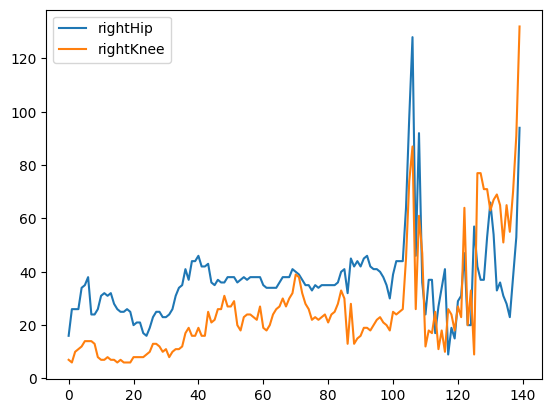

In [31]:
ura_right = ura_2[['rightHip',	'rightKnee']]
ura_right.plot()

<Axes: >

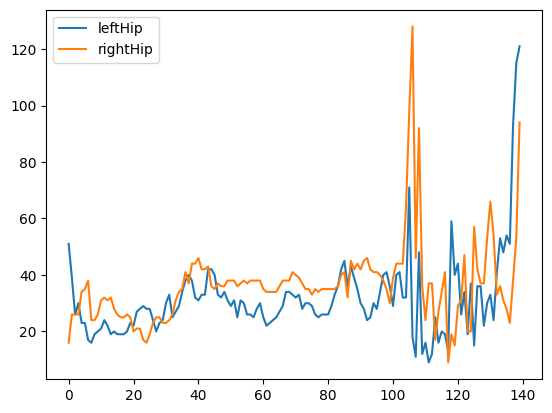

In [32]:
ura_hip = ura_2[['leftHip',	'rightHip']]
ura_hip.plot()

<Axes: >

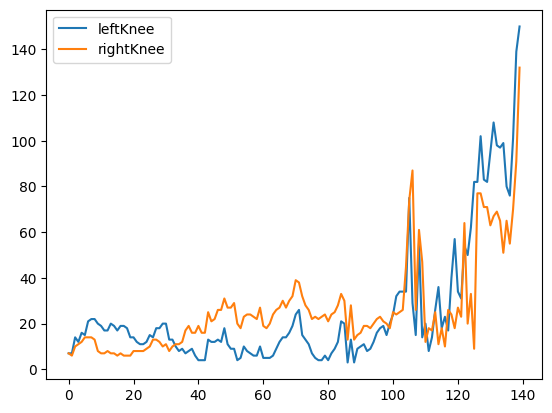

In [34]:
ura_knee = ura_2[['leftKnee',	'leftKnee']]
ura_knee.plot()

In [37]:
lin_res = ols("leftHip ~ leftKnee",data=ura_2).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                leftHip   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     75.68
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           8.89e-15
Time:                        10:00:42   Log-Likelihood:                -548.96
No. Observations:                 140   AIC:                             1102.
Df Residuals:                     138   BIC:                             1108.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6023      1.384     17.056      0.0

In [40]:
lin_res = ols("rightHip ~	rightKnee",data=ura_2).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:               rightHip   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     85.38
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           4.01e-16
Time:                        10:01:54   Log-Likelihood:                -542.71
No. Observations:                 140   AIC:                             1089.
Df Residuals:                     138   BIC:                             1095.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.8313      1.602     15.504      0.0

In [41]:
lin_res = ols("leftHip ~ leftHip",data=ura_2).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                leftHip   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.356e+35
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:02:20   Log-Likelihood:                 4776.8
No. Observations:                 140   AIC:                            -9550.
Df Residuals:                     138   BIC:                            -9544.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.776e-15   7.22e-17     24.620      0.0

In [ ]:
lin_res = ols("leftKnee ~ leftKnee",data=ura_2).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:               leftKnee   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.008e+33
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:49:22   Log-Likelihood:                 4306.1
No. Observations:                 140   AIC:                            -8608.
Df Residuals:                     138   BIC:                            -8602.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.155e-14    1.2e-15      9.599      0.0

# Лян Бао-бао

## 1 video

In [ ]:
 df = pd.read_excel('https://github.com/vn322/Sport-University/raw/main/combat/%D0%9B%D1%8F%D0%BD%D0%91%D0%B0%D0%BE%D0%B1%D0%B0%D0%BE.xlsx', index_col=None)
 df

,2D_Левый локоть,2D_Правый локоть,2D_Левое плечо,2D_Правое плечо,2D_Левое бедро,2D_Правое бедро,2D_Левое колено,2D_Правое колено,2D_Левый голеностоп,2D_Правый голеностоп,...,3D_Левое бедро,3D_Правое бедро,3D_Левое колено,3D_Правое колено,3D_Левый голеностоп,3D_Правый голеностоп,3D_Левое запястье,3D_Правое запястье,X-angle,Time
0,65,21,48,96,53,45,64,53,27,9,...,61,75,63,40,28,18,136,54,1.177990,1.696435e+09
1,62,15,54,107,55,44,68,51,28,40,...,64,76,72,30,27,42,94,34,0.822531,1.696435e+09
2,56,12,65,112,63,50,77,70,21,29,...,68,74,81,41,20,35,65,69,0.948240,1.696435e+09
3,68,83,67,42,65,50,82,76,17,16,...,76,74,87,47,20,42,11,9,1.503320,1.696435e+09
4,47,159,71,33,66,55,88,85,15,16,...,70,81,89,54,17,29,9,14,2.589202,1.696435e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,133,112,16,30,58,46,110,57,9,15,...,33,23,57,30,28,24,15,17,7.385799,1.696435e+09
60,102,16,21,0,78,54,125,56,11,28,...,55,46,72,50,24,25,12,44,5.124973,1.696435e+09
61,113,106,21,16,88,63,119,65,15,24,...,36,25,48,30,26,25,19,13,2.551077,1.696435e+09
62,45,20,21,10,123,74,145,84,64,29,...,43,30,75,52,63,30,64,31,7.447689,1.696435e+09


# Предварительное изучение

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   2D_Левый локоть       64 non-null     int64  
 1   2D_Правый локоть      64 non-null     int64  
 2   2D_Левое плечо        64 non-null     int64  
 3   2D_Правое плечо       64 non-null     int64  
 4   2D_Левое бедро        64 non-null     int64  
 5   2D_Правое бедро       64 non-null     int64  
 6   2D_Левое колено       64 non-null     int64  
 7   2D_Правое колено      64 non-null     int64  
 8   2D_Левый голеностоп   64 non-null     int64  
 9   2D_Правый голеностоп  64 non-null     int64  
 10  2D_Левое запястье     64 non-null     int64  
 11  2D_Правое запястье    64 non-null     int64  
 12  3D_Левый локоть       64 non-null     int64  
 13  3D_Правый локоть      64 non-null     int64  
 14  3D_Левое плечо        64 non-null     int64  
 15  3D_Правое плечо       64 

In [ ]:
df.describe()

,2D_Левый локоть,2D_Правый локоть,2D_Левое плечо,2D_Правое плечо,2D_Левое бедро,2D_Правое бедро,2D_Левое колено,2D_Правое колено,2D_Левый голеностоп,2D_Правый голеностоп,...,3D_Левое бедро,3D_Правое бедро,3D_Левое колено,3D_Правое колено,3D_Левый голеностоп,3D_Правый голеностоп,3D_Левое запястье,3D_Правое запястье,X-angle,Time
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,6.400000e+01
mean,64.046875,62.937500,77.578125,82.812500,50.859375,42.640625,52.984375,64.546875,42.578125,27.843750,...,56.250000,47.375000,67.265625,65.500000,35.390625,29.859375,33.859375,49.625000,6.078675,1.696435e+09
std,35.997103,44.920697,36.532571,48.734745,27.944882,30.636821,32.726133,31.982599,27.820744,15.103052,...,20.124217,23.556417,29.518486,30.863242,13.717810,13.495287,33.097675,30.183828,7.354268,3.819573e+00
min,14.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,4.000000,2.000000,1.000000,...,9.000000,9.000000,1.000000,28.000000,16.000000,12.000000,6.000000,4.000000,0.576323,1.696435e+09
25%,38.000000,15.750000,55.750000,43.500000,33.500000,18.000000,29.750000,48.000000,27.000000,17.500000,...,41.750000,30.750000,49.000000,43.750000,26.000000,20.750000,13.750000,24.750000,2.500066,1.696435e+09
50%,51.000000,63.000000,76.000000,74.000000,54.500000,31.000000,47.000000,55.000000,40.000000,28.000000,...,55.500000,41.500000,67.500000,53.000000,37.000000,27.000000,18.000000,51.500000,3.049848,1.696435e+09
75%,86.500000,99.250000,93.000000,117.000000,66.250000,57.000000,68.500000,73.000000,49.000000,37.000000,...,73.250000,64.000000,88.250000,84.500000,42.000000,38.000000,38.500000,71.250000,7.401272,1.696435e+09
max,172.000000,159.000000,179.000000,179.000000,143.000000,109.000000,165.000000,146.000000,178.000000,88.000000,...,97.000000,109.000000,128.000000,145.000000,105.000000,87.000000,136.000000,152.000000,45.869093,1.696435e+09


In [ ]:
df[['3D_Левое бедро', '3D_Правое бедро', 'X-angle']].describe()

,3D_Левое бедро,3D_Правое бедро,X-angle
count,64.000000,64.000000,64.000000
mean,56.250000,47.375000,6.078675
std,20.124217,23.556417,7.354268
min,9.000000,9.000000,0.576323
25%,41.750000,30.750000,2.500066
50%,55.500000,41.500000,3.049848
75%,73.250000,64.000000,7.401272
max,97.000000,109.000000,45.869093


In [ ]:
df.columns

Index(['2D_Левый локоть', '2D_Правый локоть', '2D_Левое плечо',
       '2D_Правое плечо', '2D_Левое бедро', '2D_Правое бедро',
       '2D_Левое колено', '2D_Правое колено', '2D_Левый голеностоп',
       '2D_Правый голеностоп', '2D_Левое запястье', '2D_Правое запястье',
       '3D_Левый локоть', '3D_Правый локоть', '3D_Левое плечо',
       '3D_Правое плечо', '3D_Левое бедро', '3D_Правое бедро',
       '3D_Левое колено', '3D_Правое колено', '3D_Левый голеностоп',
       '3D_Правый голеностоп', '3D_Левое запястье', '3D_Правое запястье',
       'X-angle', 'Time'],
      dtype='object')

In [ ]:
df[['3D_Левое бедро','3D_Левое колено']].corr()

,3D_Левое бедро,3D_Левое колено
3D_Левое бедро,1.000000,0.467337
3D_Левое колено,0.467337,1.000000


In [ ]:
df[['3D_Правое колено','3D_Правое бедро']].corr()

,3D_Правое колено,3D_Правое бедро
3D_Правое колено,1.000000,0.135756
3D_Правое бедро,0.135756,1.000000


In [ ]:
df[['3D_Левое бедро','3D_Правое бедро']].corr()

,3D_Левое бедро,3D_Правое бедро
3D_Левое бедро,1.00000,0.37525
3D_Правое бедро,0.37525,1.00000


In [ ]:
df[['3D_Правое колено','3D_Левое колено']].corr()

,3D_Правое колено,3D_Левое колено
3D_Правое колено,1.000000,0.250604
3D_Левое колено,0.250604,1.000000


In [ ]:
left=df[['3D_Левое бедро','3D_Левое колено']]
left

,3D_Левое бедро,3D_Левое колено
0,61,63
1,64,72
2,68,81
3,76,87
4,70,89
...,...,...
59,33,57
60,55,72
61,36,48
62,43,75


In [ ]:
right = df[['3D_Правое колено','3D_Правое бедро']]
right

,3D_Правое колено,3D_Правое бедро
0,40,75
1,30,76
2,41,74
3,47,74
4,54,81
...,...,...
59,30,23
60,50,46
61,30,25
62,52,30


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

<Axes: >

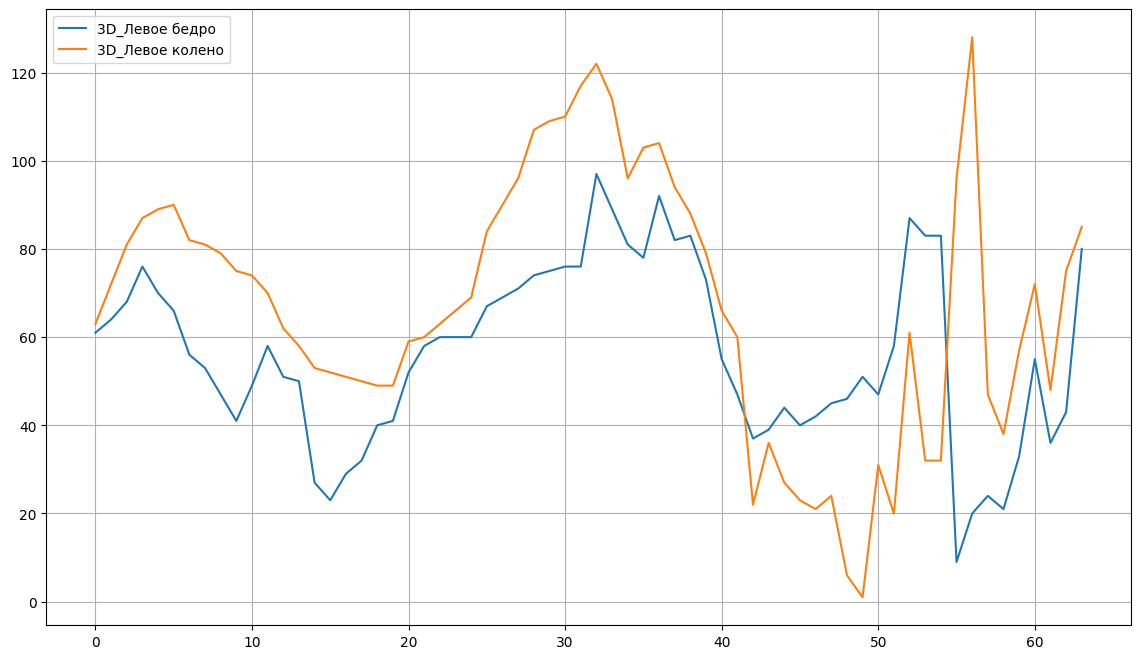

In [ ]:
#plt.tick_params = 10
left.plot(figsize = (14, 8), grid=True)

In [ ]:
left.iloc[:38].corr()

,3D_Левое бедро,3D_Левое колено
3D_Левое бедро,1.000000,0.871808
3D_Левое колено,0.871808,1.000000


<Axes: >

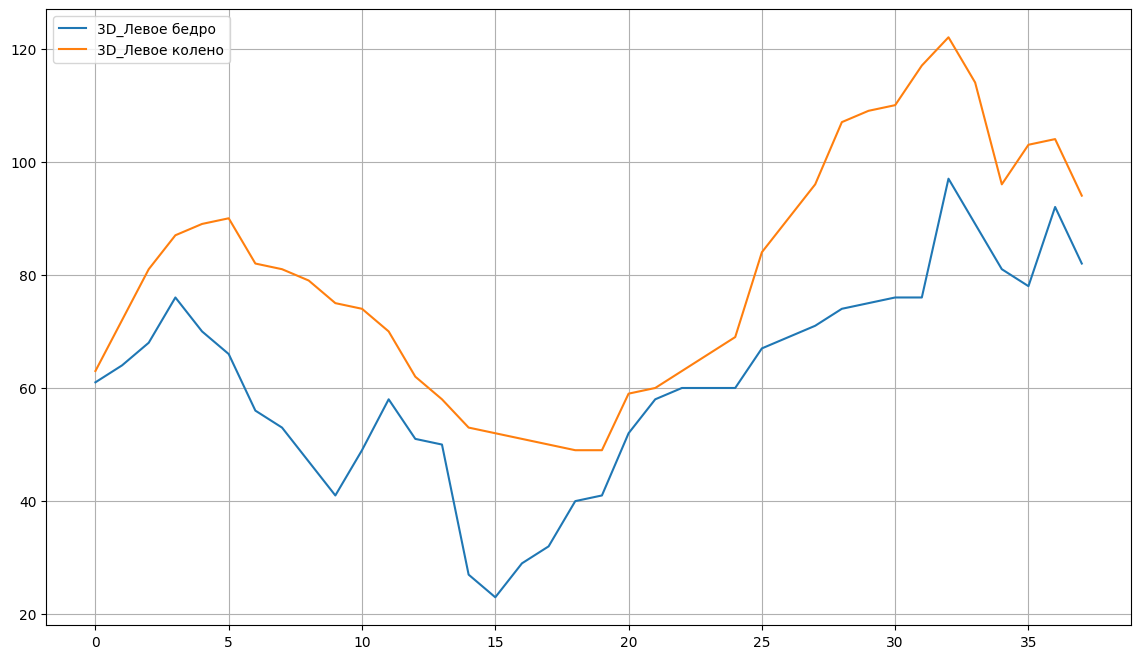

In [ ]:
left.iloc[:38].plot(figsize = (14, 8), grid=True)

In [ ]:
l_sgl= left.iloc[:38].ewm(com=5).mean()

<Axes: >

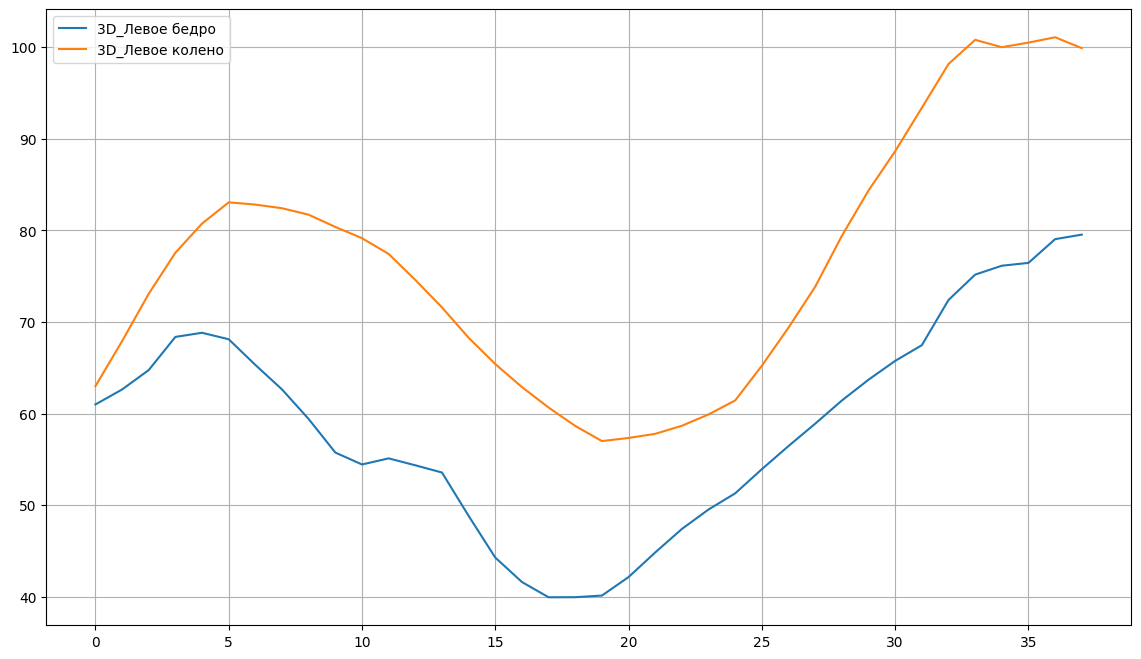

In [ ]:
l_sgl.plot(figsize = (14, 8), grid=True)

In [ ]:
l_sgl.corr()

,3D_Левое бедро,3D_Левое колено
3D_Левое бедро,1.000000,0.905571
3D_Левое колено,0.905571,1.000000


In [ ]:
df2=pd.read_excel('/content/lbb2.xlsx')
df2

,2D_Левый локоть,2D_Правый локоть,2D_Левое плечо,2D_Правое плечо,2D_Левое бедро,2D_Правое бедро,2D_Левое колено,2D_Правое колено,2D_Левый голеностоп,2D_Правый голеностоп,...,3D_Левое бедро,3D_Правое бедро,3D_Левое колено,3D_Правое колено,3D_Левый голеностоп,3D_Правый голеностоп,3D_Левое запястье,3D_Правое запястье,X-angle,Time
0,34,61,58,30,49,56,38,43,20,24,...,45,79,47,36,20,25,34,30,3.072972,1.697991e+09
1,36,57,60,32,50,54,42,43,20,25,...,43,87,51,31,20,21,40,27,1.931327,1.697991e+09
2,41,59,70,53,65,58,71,55,19,20,...,61,93,67,44,18,24,17,22,1.602633,1.697991e+09
3,55,38,74,75,75,61,80,52,13,34,...,73,103,78,33,13,35,46,14,1.128784,1.697991e+09
4,61,25,78,83,79,66,72,55,23,31,...,77,109,70,29,22,27,46,10,1.034455,1.697991e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,28,31,61,128,134,75,144,106,12,37,...,71,45,71,52,12,12,71,158,10.200436,1.697991e+09
264,25,23,70,125,100,46,156,61,18,40,...,13,10,16,9,12,9,58,147,11.937107,1.697991e+09
265,35,98,71,153,146,62,120,61,29,21,...,28,13,25,10,11,6,128,148,28.950426,1.697991e+09
266,77,22,170,169,135,44,124,41,26,17,...,94,14,92,14,9,4,128,135,42.337791,1.697991e+09


## 2video

In [ ]:
df3=pd.read_excel('/content/lbb3.xlsx')
df3

,2D_Левый локоть,2D_Правый локоть,2D_Левое плечо,2D_Правое плечо,2D_Левое бедро,2D_Правое бедро,2D_Левое колено,2D_Правое колено,2D_Левый голеностоп,2D_Правый голеностоп,...,3D_Левое бедро,3D_Правое бедро,3D_Левое колено,3D_Правое колено,3D_Левый голеностоп,3D_Правый голеностоп,3D_Левое запястье,3D_Правое запястье,X-angle,Time
0,85,45,98,95,100,81,124,95,19,7,...,75,54,89,54,19,33,96,75,1.799987,1.697991e+09
1,93,44,92,56,101,89,123,92,21,28,...,76,68,90,64,21,31,97,31,2.837054,1.697991e+09
2,95,68,96,76,102,94,123,92,23,32,...,78,77,95,71,20,33,107,57,2.524170,1.697991e+09
3,94,19,99,44,101,94,123,89,20,10,...,83,77,96,70,19,18,116,98,2.968117,1.697991e+09
4,94,45,100,42,101,89,122,88,21,24,...,81,64,95,63,20,25,119,118,5.018717,1.697991e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,177,34,166,166,5,2,45,5,52,10,...,4,5,9,2,39,3,111,166,48.562185,1.697991e+09
92,177,34,166,166,5,2,45,5,52,10,...,4,5,9,2,39,3,111,166,48.562185,1.697991e+09
93,112,66,26,17,162,153,45,50,36,39,...,167,153,108,93,28,26,143,106,7.317098,1.697991e+09
94,158,44,61,60,23,68,158,9,27,113,...,89,62,153,92,28,98,79,10,1.737295,1.697991e+09


In [ ]:
df2.columns

Index(['2D_Левый локоть', '2D_Правый локоть', '2D_Левое плечо',
       '2D_Правое плечо', '2D_Левое бедро', '2D_Правое бедро',
       '2D_Левое колено', '2D_Правое колено', '2D_Левый голеностоп',
       '2D_Правый голеностоп', '2D_Левое запястье', '2D_Правое запястье',
       '3D_Левый локоть', '3D_Правый локоть', '3D_Левое плечо',
       '3D_Правое плечо', '3D_Левое бедро', '3D_Правое бедро',
       '3D_Левое колено', '3D_Правое колено', '3D_Левый голеностоп',
       '3D_Правый голеностоп', '3D_Левое запястье', '3D_Правое запястье',
       'X-angle', 'Time'],
      dtype='object')

In [ ]:
df2=df2[['3D_Левое бедро', '3D_Левое колено']]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   3D_Левое бедро   268 non-null    int64
 1   3D_Левое колено  268 non-null    int64
dtypes: int64(2)
memory usage: 4.3 KB


In [ ]:
df2.describe()

,3D_Левое бедро,3D_Левое колено
count,268.000000,268.000000
mean,59.227612,68.186567
std,28.305524,39.233893
min,5.000000,1.000000
25%,38.000000,33.000000
50%,61.000000,68.500000
75%,77.000000,100.250000
max,133.000000,173.000000


<Axes: >

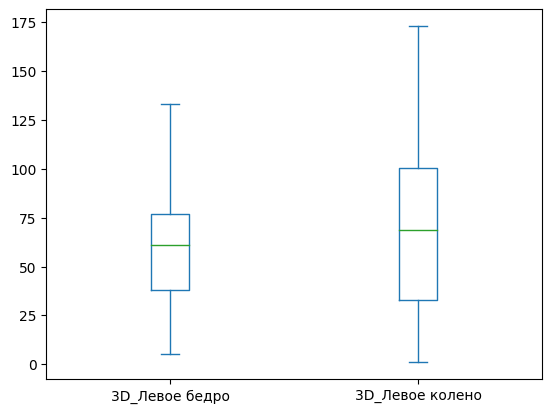

In [ ]:
df2.plot(kind='box')

<ipython-input-13-e818a162fa74>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['3D_Левое бедро'])


<Axes: xlabel='3D_Левое бедро', ylabel='Density'>

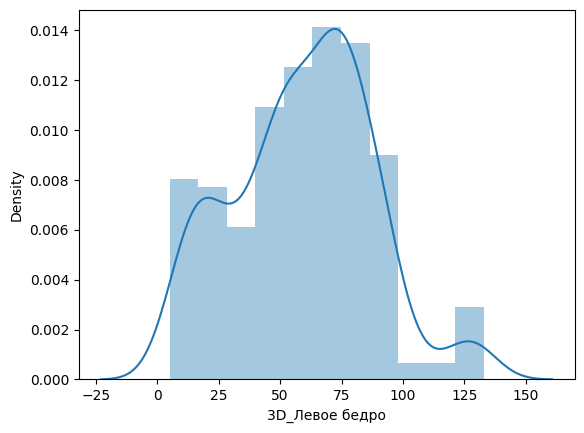

In [ ]:
import seaborn as sns
sns.distplot(df2['3D_Левое бедро'])

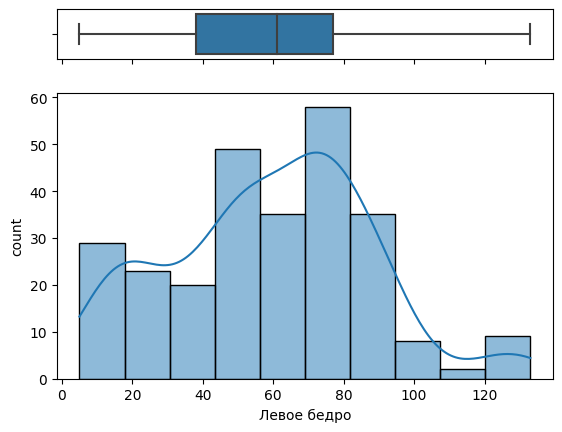

In [ ]:
# создадим два подграфика ax_box и ax_hist
# кроме того, укажем, что нам нужны:
fig, (ax_box, ax_hist) = plt.subplots(2, # две строки в сетке подграфиков,
                                    sharex = True, # единая шкала по оси x и
                                    gridspec_kw = {'height_ratios': (.15, .85)}) # пропорция 15/85 по высоте

# затем создадим графики, указав через параметр ax в какой подграфик поместить каждый из них
sns.boxplot(x = df2['3D_Левое бедро'], ax = ax_box)
sns.histplot(x = df2['3D_Левое бедро'], ax = ax_hist, bins = 10, kde = True)

# добавим подписи к каждому из графиков через метод .set()
ax_box.set(xlabel = '') # пустые кавычки удаляют подпись (!)
ax_hist.set(xlabel = 'Левое бедро')
ax_hist.set(ylabel = 'count')

# выведем результат
plt.show()

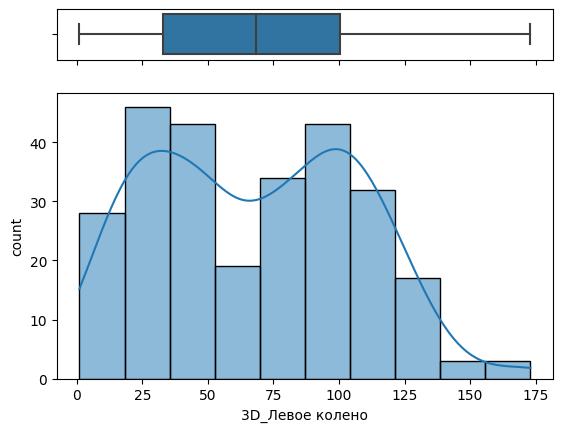

In [ ]:
# создадим два подграфика ax_box и ax_hist
# кроме того, укажем, что нам нужны:
fig, (ax_box, ax_hist) = plt.subplots(2, # две строки в сетке подграфиков,
                                    sharex = True, # единая шкала по оси x и
                                    gridspec_kw = {'height_ratios': (.15, .85)}) # пропорция 15/85 по высоте

# затем создадим графики, указав через параметр ax в какой подграфик поместить каждый из них
sns.boxplot(x = df2['3D_Левое колено'], ax = ax_box)
sns.histplot(x = df2['3D_Левое колено'], ax = ax_hist, bins = 10, kde = True)

# добавим подписи к каждому из графиков через метод .set()
ax_box.set(xlabel = '') # пустые кавычки удаляют подпись (!)
ax_hist.set(xlabel = '3D_Левое колено')
ax_hist.set(ylabel = 'count')

# выведем результат
plt.show()

<Axes: >

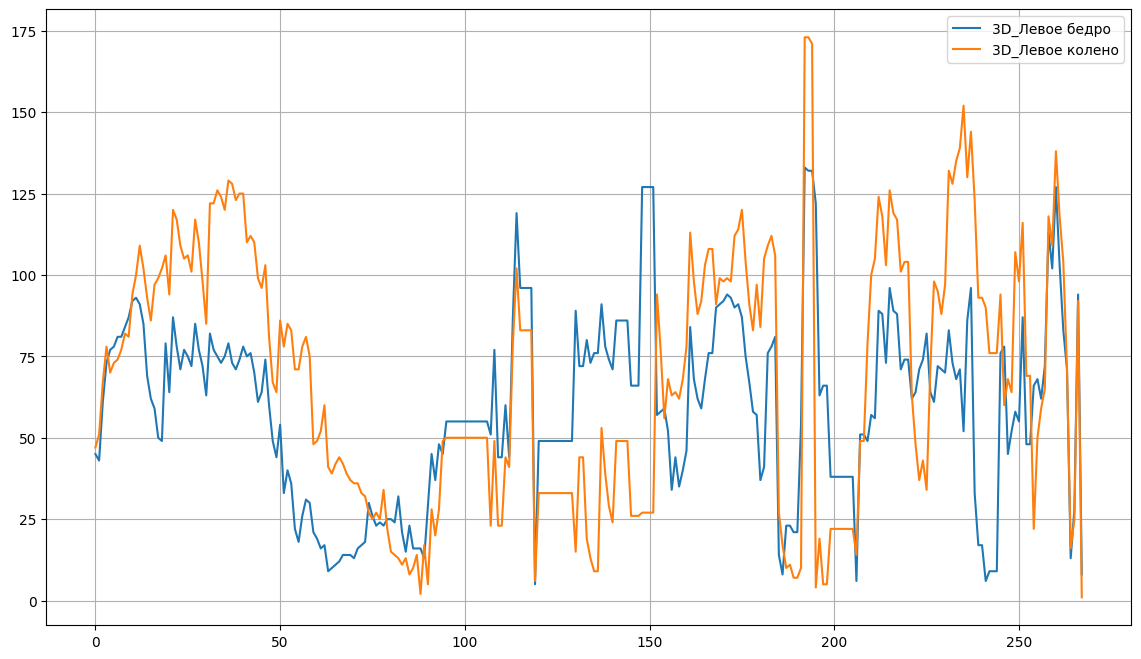

In [ ]:
df2.plot(figsize = (14, 8), grid=True)

<Axes: >

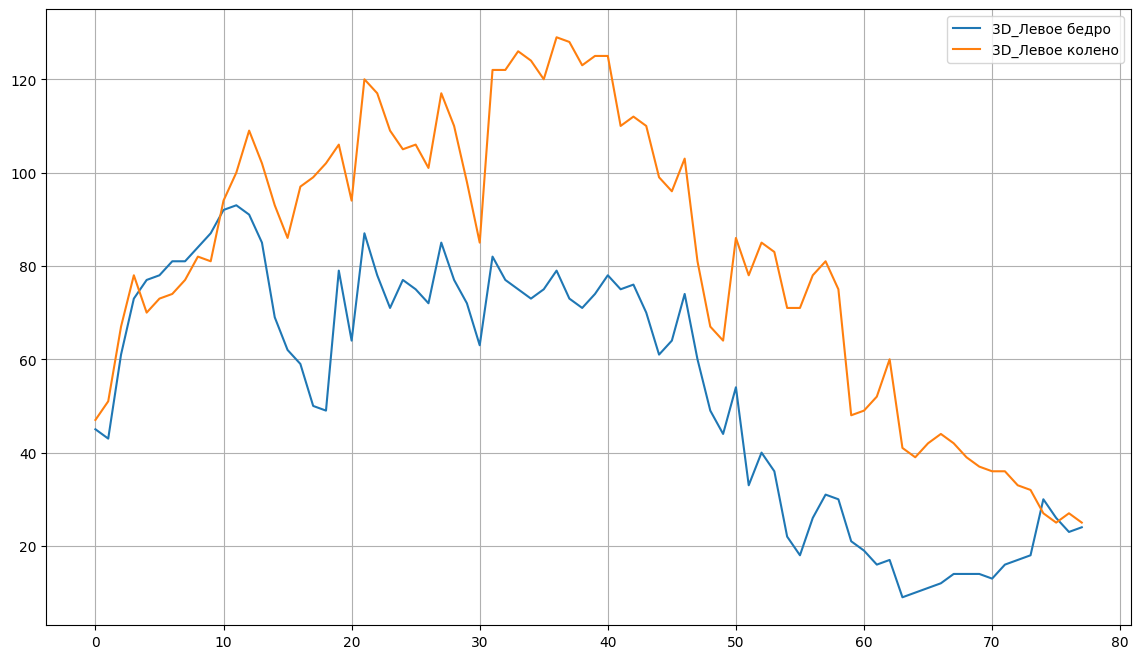

In [ ]:
df2.iloc[:78].plot(figsize = (14, 8), grid=True)

In [ ]:
df2.iloc[:78].corr()

,3D_Левое бедро,3D_Левое колено
3D_Левое бедро,1.00000,0.82129
3D_Левое колено,0.82129,1.00000


<Axes: >

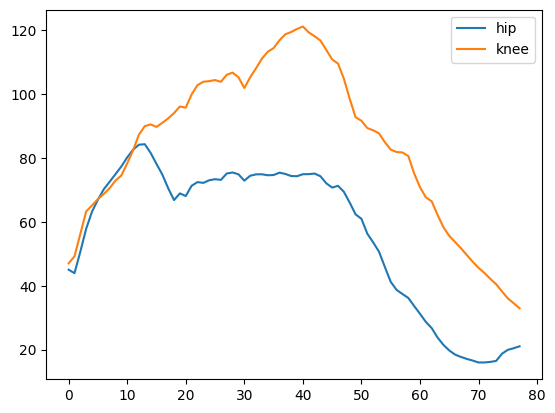

In [ ]:
df2.iloc[:78].ewm(com=5).mean().plot()

In [ ]:
left.iloc[:78].ewm(com=5).mean().corr()

,3D_Левое бедро,3D_Левое колено
3D_Левое бедро,1.000000,0.705285
3D_Левое колено,0.705285,1.000000


In [ ]:
df2 = df2.rename(columns={'3D_Левое бедро': 'hip', '3D_Левое колено': 'knee'})
df2

,hip,knee
0,45,47
1,43,51
2,61,67
3,73,78
4,77,70
...,...,...
263,71,71
264,13,16
265,28,25
266,94,92


In [ ]:
lin_res = ols("hip ~ knee",data=df2).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                    hip   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     100.5
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           2.86e-20
Time:                        07:02:19   Log-Likelihood:                -1232.8
No. Observations:                 268   AIC:                             2470.
Df Residuals:                     266   BIC:                             2477.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.4688      2.963     11.294      0.0

## 3video

In [ ]:
df3 = pd.read_excel('/content/lbb3.xlsx')
df3

,2D_Левый локоть,2D_Правый локоть,2D_Левое плечо,2D_Правое плечо,2D_Левое бедро,2D_Правое бедро,2D_Левое колено,2D_Правое колено,2D_Левый голеностоп,2D_Правый голеностоп,...,3D_Левое бедро,3D_Правое бедро,3D_Левое колено,3D_Правое колено,3D_Левый голеностоп,3D_Правый голеностоп,3D_Левое запястье,3D_Правое запястье,X-angle,Time
0,85,45,98,95,100,81,124,95,19,7,...,75,54,89,54,19,33,96,75,1.799987,1.697991e+09
1,93,44,92,56,101,89,123,92,21,28,...,76,68,90,64,21,31,97,31,2.837054,1.697991e+09
2,95,68,96,76,102,94,123,92,23,32,...,78,77,95,71,20,33,107,57,2.524170,1.697991e+09
3,94,19,99,44,101,94,123,89,20,10,...,83,77,96,70,19,18,116,98,2.968117,1.697991e+09
4,94,45,100,42,101,89,122,88,21,24,...,81,64,95,63,20,25,119,118,5.018717,1.697991e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,177,34,166,166,5,2,45,5,52,10,...,4,5,9,2,39,3,111,166,48.562185,1.697991e+09
92,177,34,166,166,5,2,45,5,52,10,...,4,5,9,2,39,3,111,166,48.562185,1.697991e+09
93,112,66,26,17,162,153,45,50,36,39,...,167,153,108,93,28,26,143,106,7.317098,1.697991e+09
94,158,44,61,60,23,68,158,9,27,113,...,89,62,153,92,28,98,79,10,1.737295,1.697991e+09


In [ ]:
df3=df3[['3D_Левое бедро', '3D_Левое колено']]

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   3D_Левое бедро   96 non-null     int64
 1   3D_Левое колено  96 non-null     int64
dtypes: int64(2)
memory usage: 1.6 KB


In [ ]:
df3.describe()

,3D_Левое бедро,3D_Левое колено
count,96.000000,96.00000
mean,63.395833,76.21875
std,22.528335,31.20803
min,4.000000,9.00000
25%,48.750000,52.00000
50%,65.500000,81.00000
75%,78.250000,102.25000
max,167.000000,153.00000


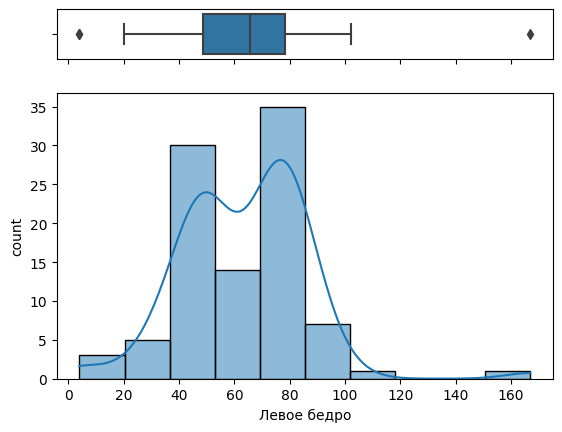

In [ ]:
# создадим два подграфика ax_box и ax_hist
# кроме того, укажем, что нам нужны:
fig, (ax_box, ax_hist) = plt.subplots(2, # две строки в сетке подграфиков,
                                    sharex = True, # единая шкала по оси x и
                                    gridspec_kw = {'height_ratios': (.15, .85)}) # пропорция 15/85 по высоте

# затем создадим графики, указав через параметр ax в какой подграфик поместить каждый из них
sns.boxplot(x = df3['3D_Левое бедро'], ax = ax_box)
sns.histplot(x = df3['3D_Левое бедро'], ax = ax_hist, bins = 10, kde = True)

# добавим подписи к каждому из графиков через метод .set()
ax_box.set(xlabel = '') # пустые кавычки удаляют подпись (!)
ax_hist.set(xlabel = 'Левое бедро')
ax_hist.set(ylabel = 'count')

# выведем результат
plt.show()

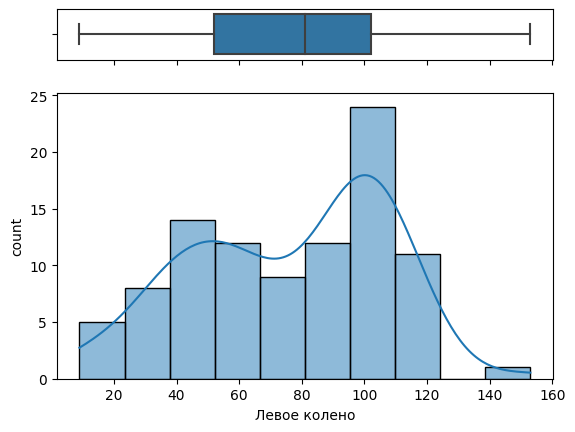

In [ ]:
# создадим два подграфика ax_box и ax_hist
# кроме того, укажем, что нам нужны:
fig, (ax_box, ax_hist) = plt.subplots(2, # две строки в сетке подграфиков,
                                    sharex = True, # единая шкала по оси x и
                                    gridspec_kw = {'height_ratios': (.15, .85)}) # пропорция 15/85 по высоте

# затем создадим графики, указав через параметр ax в какой подграфик поместить каждый из них
sns.boxplot(x = df3['3D_Левое колено'], ax = ax_box)
sns.histplot(x = df3['3D_Левое колено'], ax = ax_hist, bins = 10, kde = True)

# добавим подписи к каждому из графиков через метод .set()
ax_box.set(xlabel = '') # пустые кавычки удаляют подпись (!)
ax_hist.set(xlabel = 'Левое колено')
ax_hist.set(ylabel = 'count')

# выведем результат
plt.show()

<Axes: >

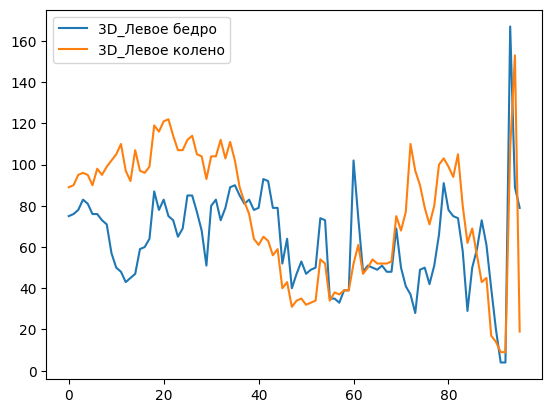

In [ ]:
df3.plot()

<Axes: >

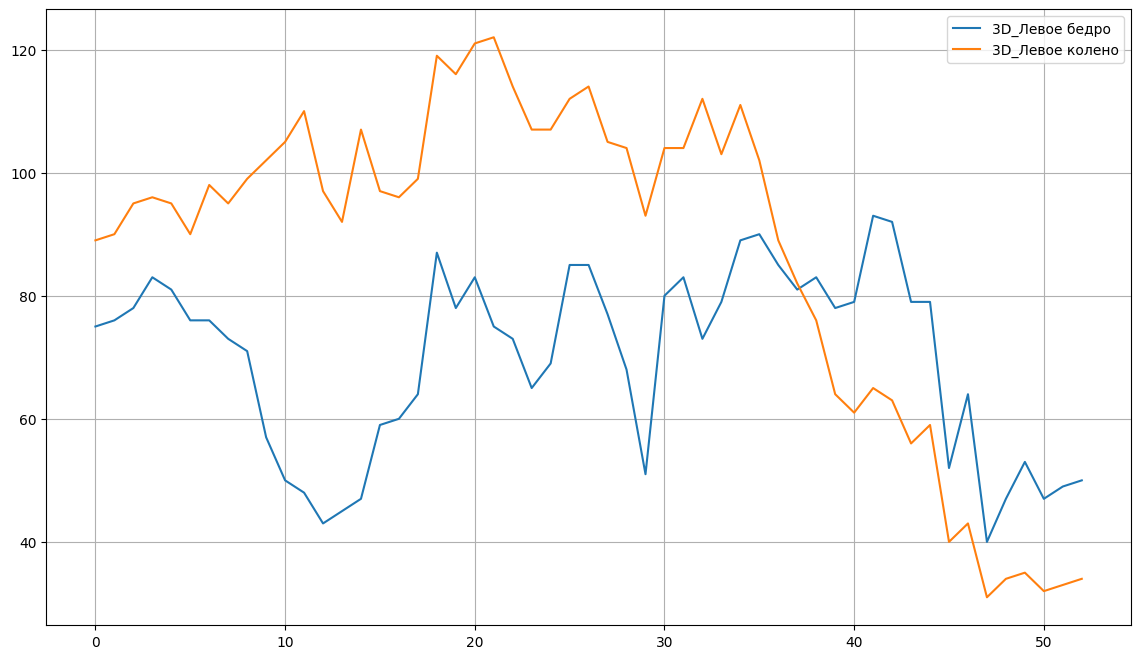

In [ ]:
df3.iloc[:53].plot(figsize = (14, 8), grid=True)

In [ ]:
df3.corr()

,3D_Левое бедро,3D_Левое колено
3D_Левое бедро,1.000000,0.518297
3D_Левое колено,0.518297,1.000000


In [ ]:
df3.iloc[:53].corr()

,3D_Левое бедро,3D_Левое колено
3D_Левое бедро,1.000000,0.376585
3D_Левое колено,0.376585,1.000000


<Axes: >

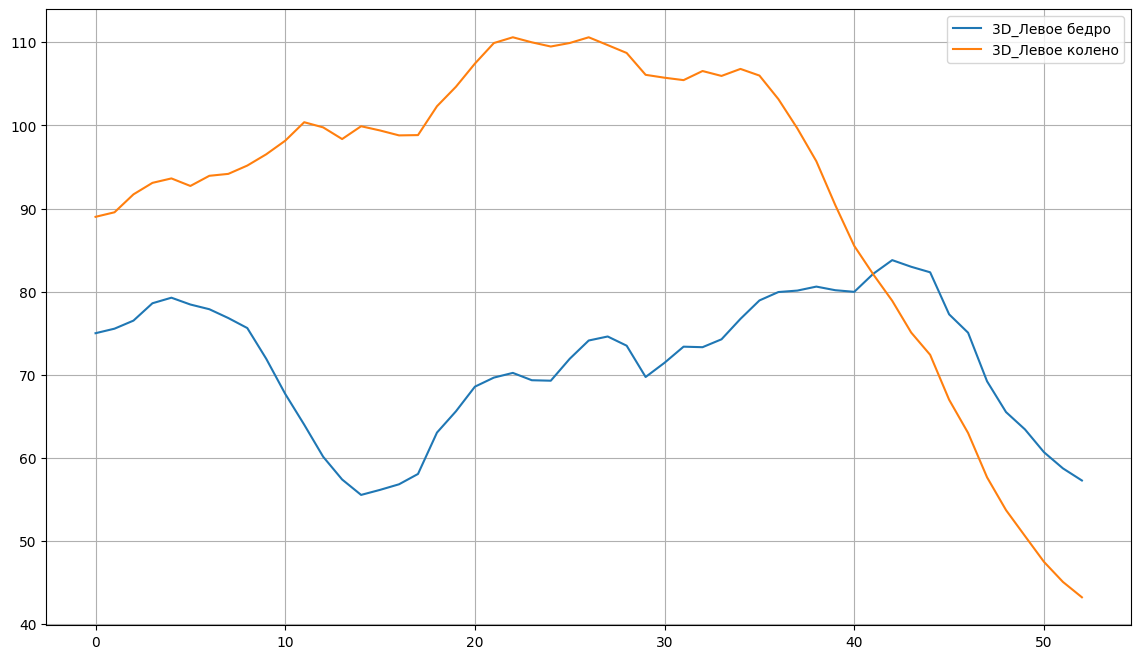

In [ ]:
df3.iloc[:53].ewm(com=5).mean().plot(figsize = (14, 8), grid=True)

In [ ]:
df3.iloc[:53].ewm(com=5).mean().corr()

,3D_Левое бедро,3D_Левое колено
3D_Левое бедро,1.00000,0.12898
3D_Левое колено,0.12898,1.00000


In [ ]:
df3 = df3.rename(columns={'3D_Левое бедро': 'hip', '3D_Левое колено': 'knee'})
df3

,hip,knee
0,75,89
1,76,90
2,78,95
3,83,96
4,81,95
...,...,...
91,4,9
92,4,9
93,167,108
94,89,153


In [ ]:
lin_res = ols("hip ~ knee",data=df3).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                    hip   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     34.53
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           6.35e-08
Time:                        07:19:26   Log-Likelihood:                -419.72
No. Observations:                  96   AIC:                             843.4
Df Residuals:                      94   BIC:                             848.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.8789      5.240      6.656      0.0

# Разное

<AxesSubplot:>

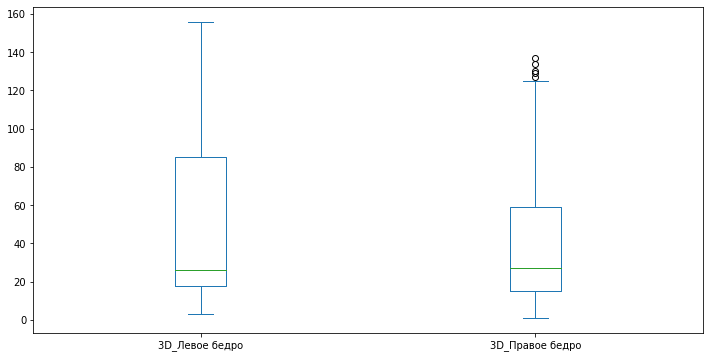

In [ ]:

df14[['3D_Левое бедро','3D_Правое бедро']].plot(figsize = (12, 6), kind='box')

In [ ]:
import seaborn as sns

In [ ]:
B = df14[['3D_Левое бедро','3D_Правое бедро']]
B

,3D_Левое бедро,3D_Правое бедро
0,24,10
1,23,8
2,22,7
3,23,7
4,23,6
...,...,...
1034,21,52
1035,19,51
1036,14,56
1037,13,49


<AxesSubplot:ylabel='Density'>

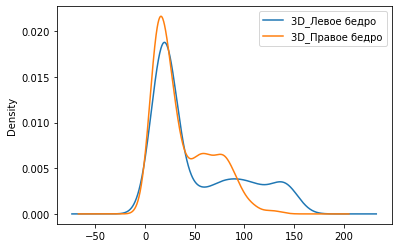

In [ ]:
B.plot.kde()

Выделение отдельных бросков

In [ ]:
A1 = B.iloc[100:228]
A1

,3D_Левое бедро,3D_Правое бедро
100,21,16
101,22,18
102,27,18
103,31,16
104,31,15
...,...,...
223,45,52
224,38,51
225,26,46
226,24,39


<AxesSubplot:ylabel='Density'>

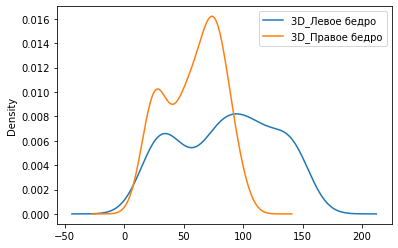

In [ ]:
A1.plot.kde()

In [ ]:
A11 = A1.rename(columns={'3D_Левое бедро': "lefthip", '3D_Правое бедро': "righthip"}, errors="raise")

In [ ]:
A11.corr()

,lefthip,righthip
lefthip,1.00,0.31
righthip,0.31,1.00


In [ ]:

A11.describe()

,lefthip,righthip
count,128.00,128.00
mean,85.81,58.24
std,40.39,23.43
min,20.00,15.00
25%,48.25,38.00
50%,87.50,63.50
75%,116.75,77.00
max,148.00,99.00


<AxesSubplot:>

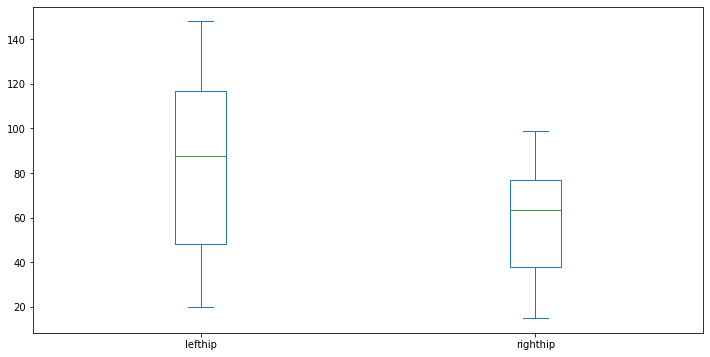

In [ ]:
A11.plot(figsize = (12, 6), kind='box')

In [ ]:
A2 = B.iloc[369:506]
A2

,3D_Левое бедро,3D_Правое бедро
369,28,24
370,28,34
371,25,31
372,25,30
373,25,28
...,...,...
501,26,26
502,25,19
503,23,24
504,19,17


In [ ]:
A21 = A2.rename(columns={'3D_Левое бедро': "lefthip", '3D_Правое бедро': "righthip"}, errors="raise")

In [ ]:
A21.describe()

,lefthip,righthip
count,137.00,137.00
mean,82.18,60.72
std,41.35,31.38
min,18.00,15.00
25%,42.00,31.00
50%,87.00,56.00
75%,115.00,87.00
max,145.00,137.00


In [ ]:
A3 = B.iloc[638:770]
A3

,3D_Левое бедро,3D_Правое бедро
638,21,22
639,21,21
640,26,26
641,33,31
642,34,39
...,...,...
765,48,9
766,26,8
767,22,10
768,32,14


In [ ]:
A31 = A3.rename(columns={'3D_Левое бедро': "lefthip", '3D_Правое бедро': "righthip"}, errors="raise")

In [ ]:
A31.describe()

,lefthip,righthip
count,132.00,132.00
mean,76.70,56.69
std,40.13,23.89
min,7.00,8.00
25%,45.00,37.75
50%,80.00,59.00
75%,106.25,76.50
max,143.00,112.00


In [ ]:
A4 = B.iloc[898:1019]
A4

,3D_Левое бедро,3D_Правое бедро
898,24,21
899,29,21
900,34,27
901,47,40
902,52,50
...,...,...
1014,21,32
1015,21,35
1016,21,41
1017,23,43


In [ ]:
A4.describe()

,3D_Левое бедро,3D_Правое бедро
count,121.00,121.00
mean,89.47,58.45
std,45.60,25.20
min,21.00,21.00
25%,49.00,34.00
50%,85.00,58.00
75%,140.00,77.00
max,156.00,127.00


# Статистический анализ

In [ ]:
A41 = A4.rename(columns={'3D_Левое бедро': "lefthip", '3D_Правое бедро': "righthip"}, errors="raise")

In [ ]:
# Kruskal-Wallis H-test
from scipy.stats import kruskal


# compare samples
stat, p = kruskal(A11["lefthip"], A21["lefthip"], A31["lefthip"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=3.482, p=0.175
Same distributions (fail to reject H0)


In [ ]:
# Kruskal-Wallis H-test
from scipy.stats import kruskal


# compare samples
stat, p = kruskal(A11["righthip"], A21["righthip"], A31["righthip"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=0.856, p=0.652
Same distributions (fail to reject H0)


In [ ]:
# Kruskal-Wallis H-test
from scipy.stats import kruskal


# compare samples
stat, p = kruskal(A11["lefthip"], A11["righthip"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=33.810, p=0.000
Different distributions (reject H0)


In [ ]:
# Kruskal-Wallis H-test
from scipy.stats import kruskal


# compare samples
stat, p = kruskal(A11["righthip"], A21["righthip"], A31["righthip"],A11["lefthip"], A21["lefthip"], A31["lefthip"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=71.483, p=0.000
Different distributions (reject H0)


In [ ]:
A11.corr()

,lefthip,righthip
lefthip,1.00,0.31
righthip,0.31,1.00


In [ ]:
A21.corr()

,lefthip,righthip
lefthip,1.00,0.31
righthip,0.31,1.00


In [ ]:
A31.corr()

,lefthip,righthip
lefthip,1.00,0.35
righthip,0.35,1.00


In [ ]:
B.corr()

,3D_Левое бедро,3D_Правое бедро
3D_Левое бедро,1.00,0.64
3D_Правое бедро,0.64,1.00


In [ ]:
pd.concat([A1, A2, A3]).corr()

,3D_Левое бедро,3D_Правое бедро
3D_Левое бедро,1.00,0.32
3D_Правое бедро,0.32,1.00


# Построение регрессии для полного движения первого броска

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
y = A11.iloc[:,1:2].values
X = A11.iloc[:,0:1].values


In [ ]:
A11.iloc[:,1:2]

,righthip
100,16
101,18
102,18
103,16
104,15
...,...
223,52
224,51
225,46
226,39


In [ ]:
A11.iloc[:,0:1]

,lefthip
100,21
101,22
102,27
103,31
104,31
...,...
223,45
224,38
225,26
226,24


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.coef_

array([[0.18141192]])

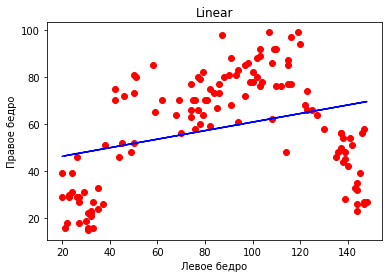

In [ ]:
plt.scatter(X,y, color='red')
plt.plot(X, lin_reg.predict(X),color='blue')
plt.title("Linear")
plt.ylabel('Правое бедро')
plt.xlabel('Левое бедро')
plt.show()

In [ ]:

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

In [ ]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)
lin_reg2.coef_

array([[ 0.        ,  2.37268614, -0.01311694]])

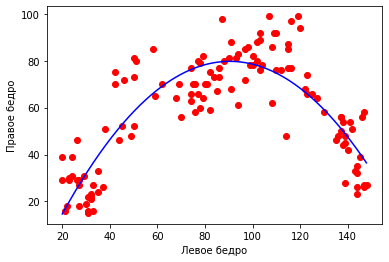

In [ ]:

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

plt.figsize = (12, 6)
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X,y, color='red')

plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue')

#plt.title("Polynomial")
plt.ylabel('Правое бедро')
plt.xlabel('Левое бедро')
plt.show()


In [ ]:
y_poly_pred = lin_reg2.predict(X_poly)
r2_score(y, y_poly_pred)

0.7258736880099964

In [ ]:
np.sqrt(mean_squared_error(y, y_poly_pred))

12.220734585686955

In [ ]:
for i in range(2,20):

  poly_reg = PolynomialFeatures(degree=i)
  X_poly = poly_reg.fit_transform(X)
  lin_regN = LinearRegression()
  lin_regN.fit(X_poly,y)
  print(i,r2_score(y, lin_regN.predict(X_poly)), np.sqrt(mean_squared_error(y, lin_regN.predict(X_poly))))

2 0.7258736880099964 12.220734585686955
3 0.7480862819015195 11.715150153880828
4 0.7508856172543061 11.649877310162774
5 0.7516700888081999 11.631519872553719
6 0.8031771281640537 10.355229597148663
7 0.7856674604517465 10.806025929282708
8 0.776299061942969 11.03966393645138
9 0.7834884232179665 10.860817393842735
10 0.7851556725670876 10.818919668378745
11 0.7644379835459174 11.328556684224987
12 0.7286695680399649 12.158253761006614
13 0.6957149202060791 12.875445928182263
14 0.6705074228538517 13.398147912880555
15 0.5812615560205732 15.104048373059733
16 0.552669744945929 15.611192776177138
17 0.5241271523794702 16.101539922348273
18 0.49663032446212685 16.560196084072665
19 0.4706350308954549 16.98241891158282


# Регрессия для серии из 4-х бросков без купюр

In [ ]:
y = B['3D_Левое бедро']
X = B['3D_Правое бедро']


In [ ]:
y = B.iloc[:,1:2].values
X = B.iloc[:,0:1].values
y

array([[10],
       [ 8],
       [ 7],
       ...,
       [56],
       [49],
       [39]])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.coef_

array([[0.4178247]])

In [ ]:

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

In [ ]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)
lin_reg2.coef_

array([[ 0.        ,  1.87149299, -0.01010053]])

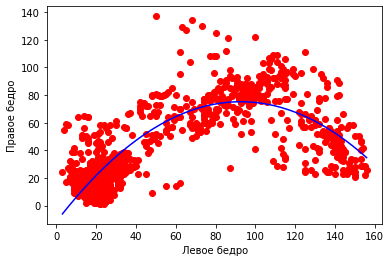

In [ ]:

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

plt.figsize = (12, 6)
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X,y, color='red')

plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue')

#plt.title("Polynomial")
plt.ylabel('Правое бедро')
plt.xlabel('Левое бедро')
plt.show()


In [ ]:
y_poly_pred = lin_reg2.predict(X_poly)
r2_score(y, y_poly_pred)

0.6643618817359491

# Регрессия для активной части первого броска

<AxesSubplot:>

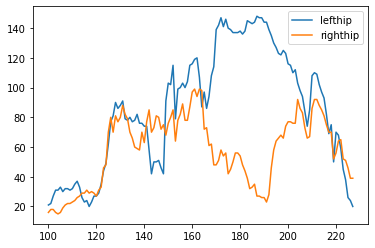

In [ ]:
A11.plot()

<AxesSubplot:>

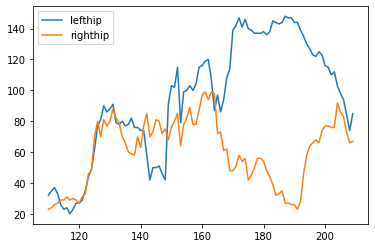

In [ ]:
A11[10:110].plot()

In [ ]:
HLF = A11[10:110]

In [ ]:
y = HLF.iloc[:,1:2].values
X = HLF.iloc[:,0:1].values

In [ ]:

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

In [ ]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)
lin_reg2.coef_

array([[ 0.        ,  2.30207332, -0.01289525]])

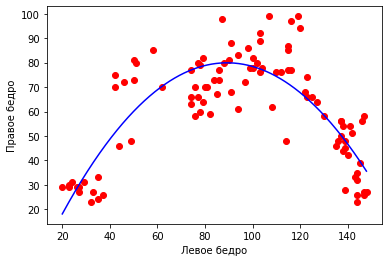

In [ ]:

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

plt.figsize = (12, 6)
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X,y, color='red')

plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue')

#plt.title("Polynomial")
plt.ylabel('Правое бедро')
plt.xlabel('Левое бедро')
plt.show()


In [ ]:
y_poly_pred = lin_reg2.predict(X_poly)
r2_score(y, y_poly_pred)

0.6883960456404762

In [ ]:
np.sqrt(mean_squared_error(y, y_poly_pred))

12.009977922082204

# Регрессия для активной части первого броска со сглаживанием

<AxesSubplot:>

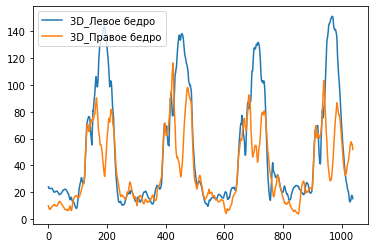

In [ ]:
df14[['3D_Левое бедро','3D_Правое бедро']].ewm(com=5).mean().plot()

<AxesSubplot:>

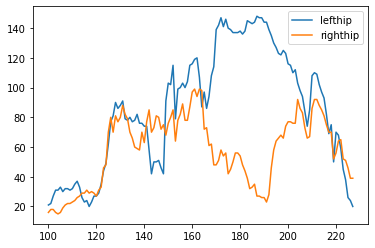

In [ ]:
A11.plot()

<AxesSubplot:>

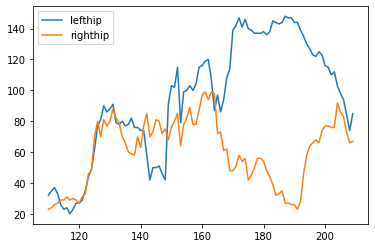

In [ ]:
A11[10:110].plot()

In [ ]:
HLF = A11[10:110]
HLF = HLF.ewm(com=5).mean()

<AxesSubplot:>

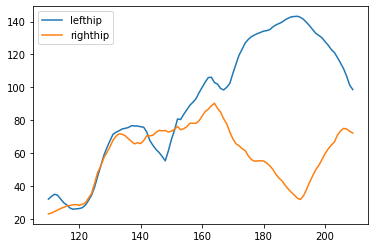

In [ ]:
HLF.plot()

In [ ]:
y = HLF.iloc[:,1:2].values
X = HLF.iloc[:,0:1].values

In [ ]:

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

In [ ]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)
lin_reg2.coef_

array([[ 0.        ,  2.51651746, -0.01397172]])

In [ ]:
2.51468013-0.01400068*40

1.95465293

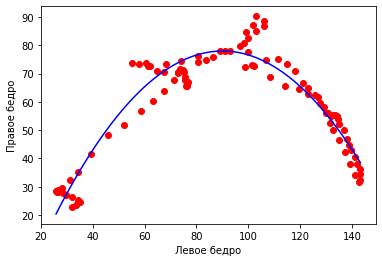

In [ ]:

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

plt.figsize = (12, 6)
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X,y, color='red')

plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue')

#plt.title("Polynomial")
plt.ylabel('Правое бедро')
plt.xlabel('Левое бедро')
plt.show()


In [ ]:
y_poly_pred = lin_reg2.predict(X_poly)
r2_score(y, y_poly_pred)

0.9061678274474265

In [ ]:
np.sqrt(mean_squared_error(y, y_poly_pred))

5.676265443847587